In [1]:
import tensorflow as tf
import os


In [ ]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
import cv2
import imghdr

In [ ]:
# data_dir = 'data' 
# image_exts = ['jpeg','jpg', 'bmp', 'png']


In [ ]:
# os.listdir(os.path.join(data_dir,"happy"))
# os.listdir(data_dir)

In [ ]:
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             # os.remove(image_path)

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:

data = tf.keras.utils.image_dataset_from_directory('data2')


Found 132 files belonging to 2 classes.


In [ ]:
# data_iterator = data.as_numpy_iterator() 
# # 

In [ ]:
# batch = data_iterator.next() #images represented as numpy arrays


In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

In [5]:
data = data.map(lambda x,y: (x/255, y))
 

(32,)


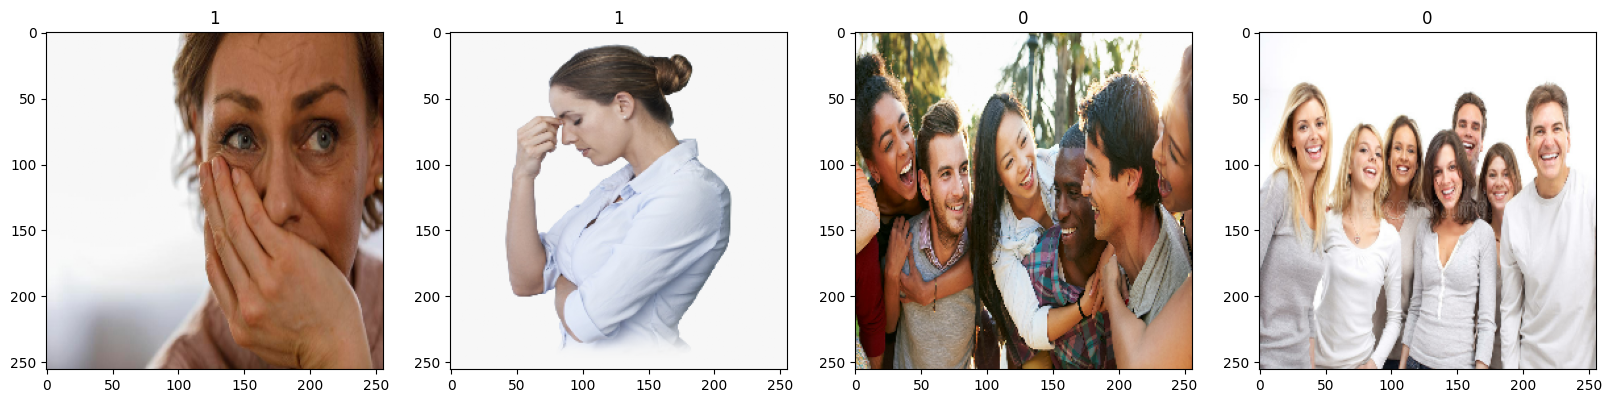

In [30]:
# data.as_numpy_iterator().next()[0].max()


scaled_iterator = data.as_numpy_iterator() 


batch = scaled_iterator.next() #images represented as numpy arrays

print(batch[1].shape)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [13]:
len(data) #batches

5

In [14]:
# train_size = int(len(data)*.7) #to train
train_size = 3
# val_size = int(len(data)*.2) #to evaluate while training
val_size = 1
# test_size = int(len(data)*.1)+1 #to test
test_size = 1

In [15]:
test_size

1

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [19]:
len(val)

1

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [21]:
model = Sequential()


In [22]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [23]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [25]:
logdir='logs' #


In [26]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #to save model


In [27]:
# train[1]

In [39]:
# hist = model.fit(train, epochs=3, validation_data=val,callbacks=[tensorboard_callback])
hist = model.fit(train, epochs=20, validation_data=val)


Epoch 1/20
3/3 [==============================] - 8s 3s/step - loss: 0.1612 - accuracy: 0.9583 - val_loss: 0.1376 - val_accuracy: 0.9688
Epoch 2/20
3/3 [==============================] - 8s 2s/step - loss: 0.1166 - accuracy: 0.9792 - val_loss: 0.0615 - val_accuracy: 1.0000
Epoch 3/20
3/3 [==============================] - 8s 2s/step - loss: 0.0615 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 8s 2s/step - loss: 0.0629 - accuracy: 0.9792 - val_loss: 0.0434 - val_accuracy: 1.0000
Epoch 5/20
3/3 [==============================] - 8s 3s/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 6/20
3/3 [==============================] - 8s 2s/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 7/20
3/3 [==============================] - 8s 2s/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 8/20
3/3 [=========================

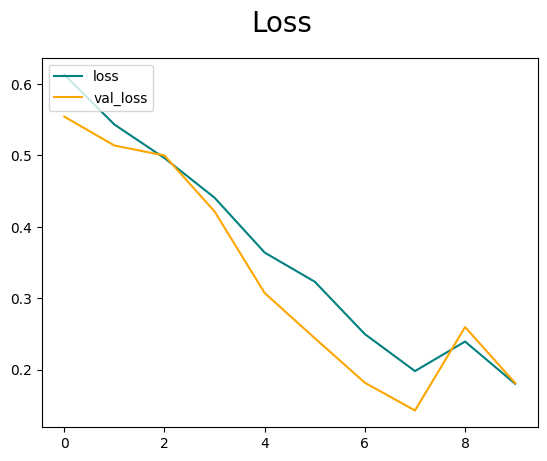

In [37]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

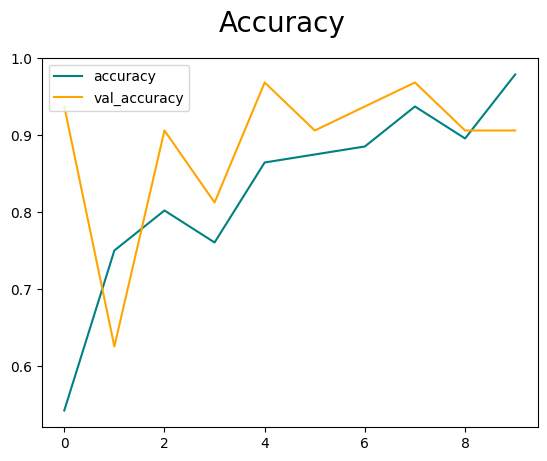

In [38]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()}')


In [ ]:
import cv2
img = cv2.imread('265.png')
plt.imshow(img)
plt.show()


In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))


In [ ]:
yhat


In [ ]:
if yhat < 0.5: 
    print(f'Predicted class is Circle')
else:
    print(f'Predicted class is Square')